In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# %matplotlib inline 의 역할 : notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 (이는 IPython에서 제공하는 RIch output에 대한 표현 방식으로 도표와 같은 그림, 소리, 애니메이션과 같은 결과물들을 rich output이라고 함)

In [2]:
data=pd.read_csv("C:/python_directory/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum() # checking null-values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

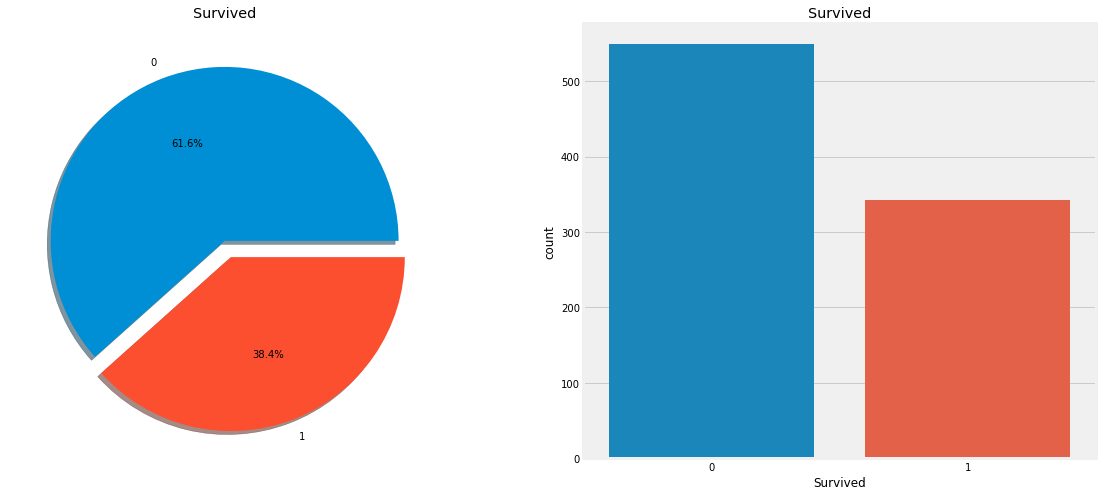

In [4]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

### 범주형, 순서형, 연속형
### Sex -> categorical feature

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count() # 1:Survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

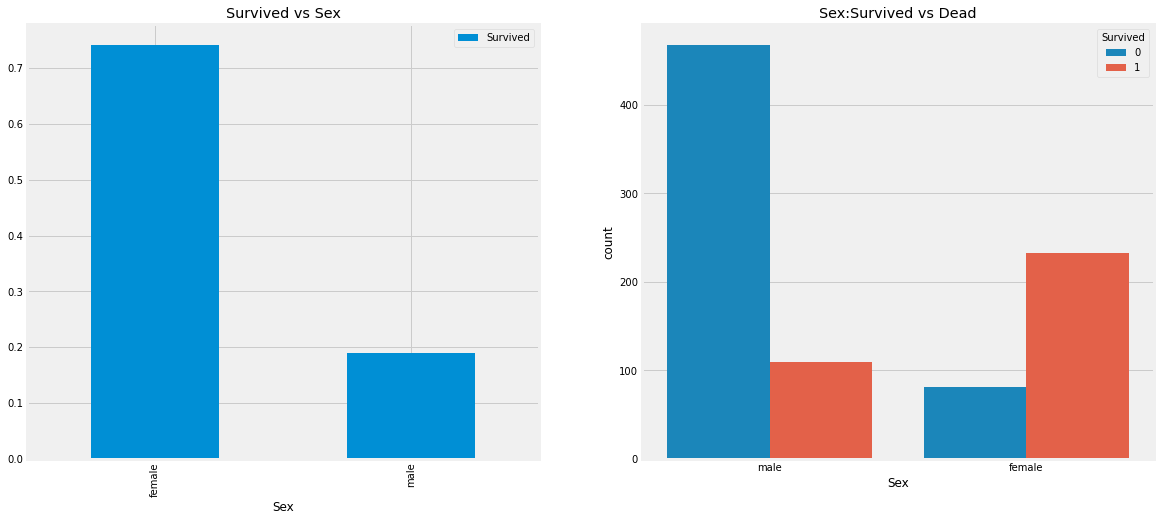

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


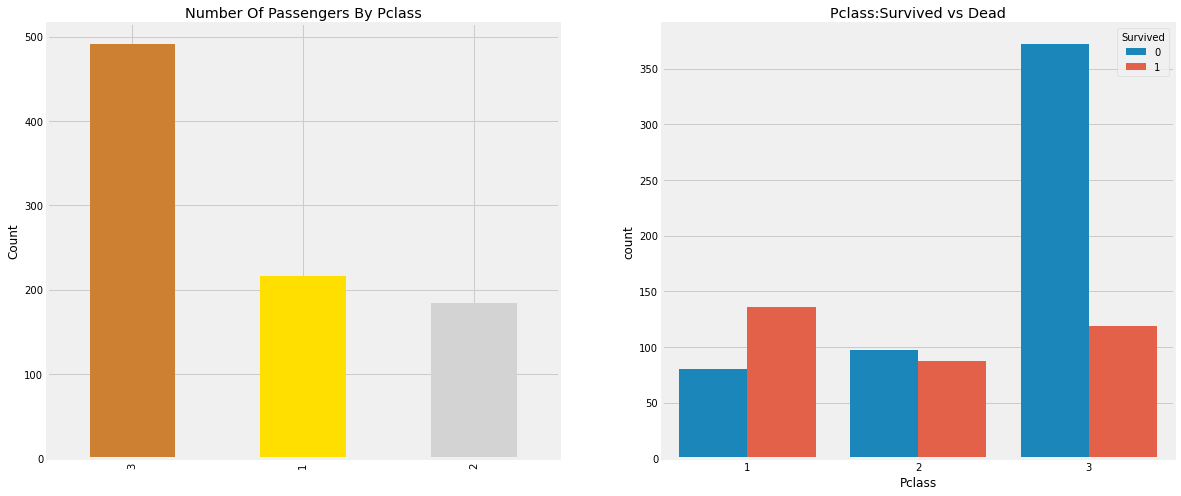

In [8]:
f, ax = plt.subplots(1, 2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
data.shape[0] # data의 행개수

891

In [10]:
data.shape[1] # data의 열개수

12

In [11]:
# Pcalss -> Ordical Feature
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient('summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


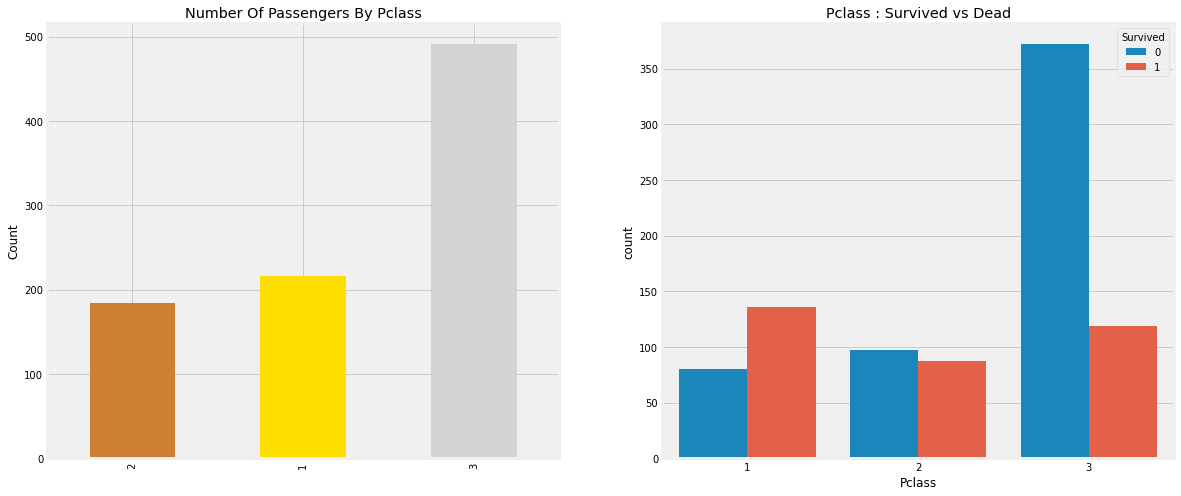

In [12]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts(ascending=True).plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1]) # 0이 사망
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# 변수 3개 crosstab
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

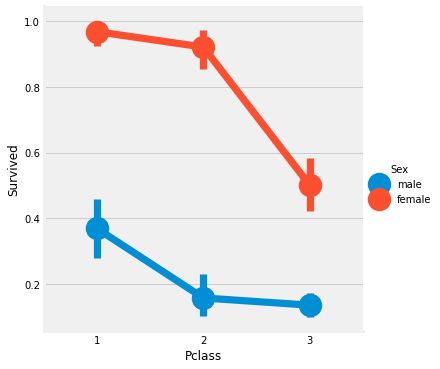

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data) # 각 Pclass의 성별에 따른 사람들의 생존률
plt.show()
 # it is evident that irrespective of Pclass, Women were given first priority while rescue.

### Age -> Continuous Feature

In [16]:
print('Oldes Passenger was of : ', data['Age'].max(), ' Years')
print('Youngest Passenger was of :', data['Age'].min(), ' Years')
print('Average Passenger was of :', data['Age'].mean(), ' Years')

Oldes Passenger was of :  80.0  Years
Youngest Passenger was of : 0.42  Years
Average Passenger was of : 29.69911764705882  Years


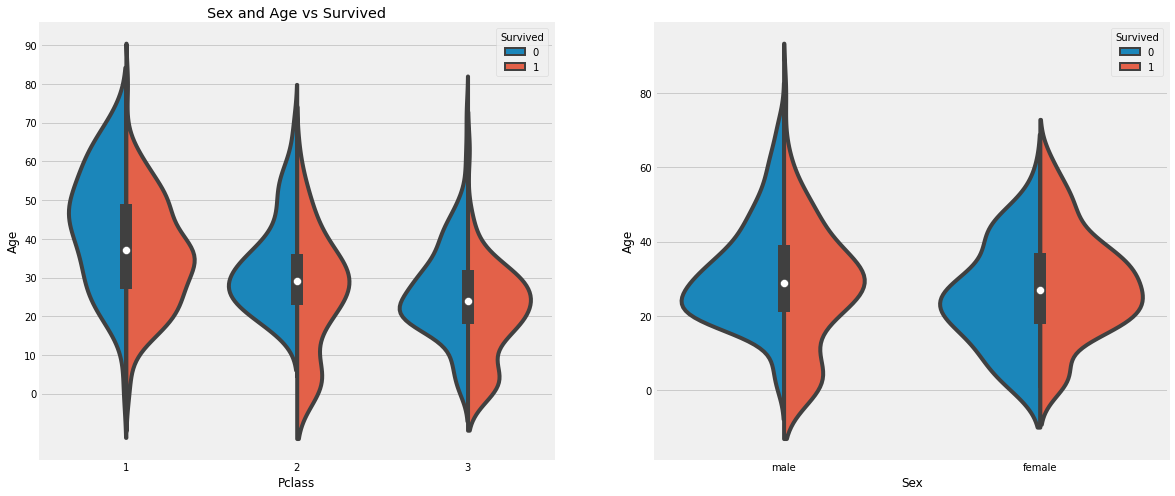

In [17]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", 'Age', hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))

sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[0].set_title("Sex and Age vs Survived")
ax[0].set_yticks(range(0,100,10))
plt.show()

 # insight : 10세 이하의 어린이는 Pclass나 Sex에 관계없이 살아남은 비율이 높음

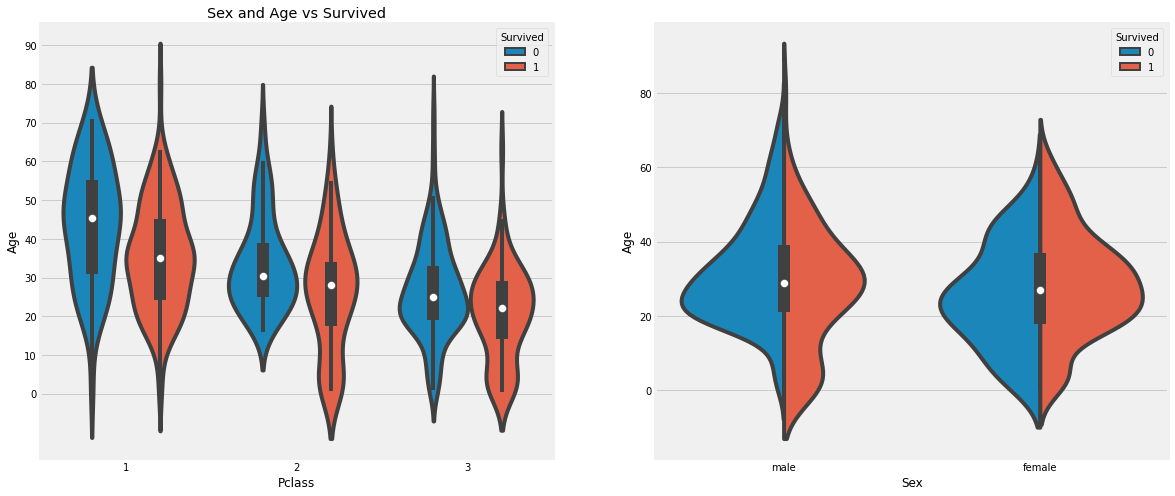

In [18]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# split = False로 하는 경우 : split이 진행되지않으므로 각각 분리되어 생성
sns.violinplot("Pclass", 'Age', hue="Survived", data=data, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))

# split = True로하는 경우 : 하나의 violinplot에 hue에 따라 split이 진행
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[0].set_title("Sex and Age vs Survived")
ax[0].set_yticks(range(0,100,10))
plt.show()

In [19]:
# Age에 있는 NaN value를 어떻게 처리할 것인가
# idea : Name에 있는 salutaion(ex. Mr, Mrs. etc)를 반영해 그룹지어 연령대 NaN을 채워보자
data[['Name', 'Age']].head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [20]:
data['Initial']=0
for i in data :
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 정규표현식을 이용해서 salutatin을 뽑아내고자함 (이름 변수에서 뒤에.이 붙는 문자열을 뽑아옴) / 정규표현식에서 그냥 .은 \n 제외 모든 문자와 매칭된다 따라서 \.의 형태로 작성해 말그대로 dot(.)을 의미함을 지정해줌

In [21]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# 중간에 T.를 넣어주지않으면 crosstab이 세로로 생성됨!
# 살펴보면 capt나 Mlle, Mme와 같이 Miss나 Mr로 단순 흡수시킬 수 있는 표현들이 관찰됨 이를 처리해보자

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
# salutation 정리 및 흡수(5개만 남기고)
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
# Filling NaN Ages - 그룹별 평균 연령대로 넣고자함
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [25]:
data.Age.isnull().any()

False

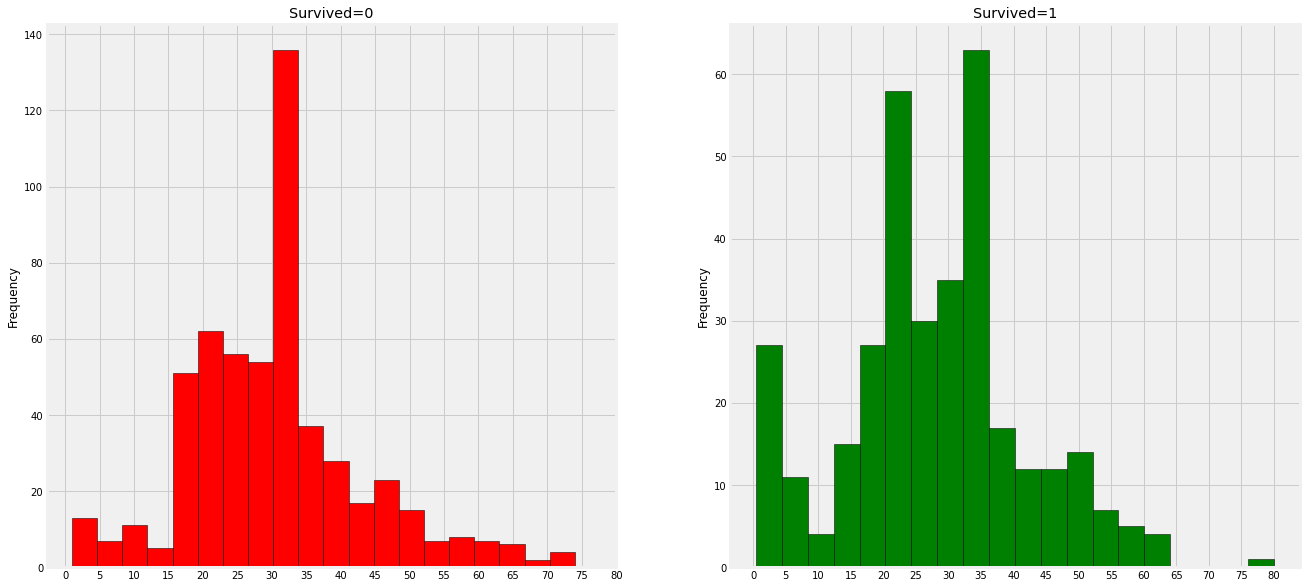

In [26]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red') # bins : 몇개의 구간으로 나눠 히스토그램을 그릴 것인지 확인
ax[0].set_title('Survived=0')
x1=list(range(0,85,5)) # 두 그래프에 xticks 공통으로 적용
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black',color='green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(x1)
plt.show()

#  insight : the oldest passenger : 80 / 30-40대에서 대부분의 사망이 발생 / 5살 미만의 아기들은 대부분 살아남았음(Women and Child first Policy)

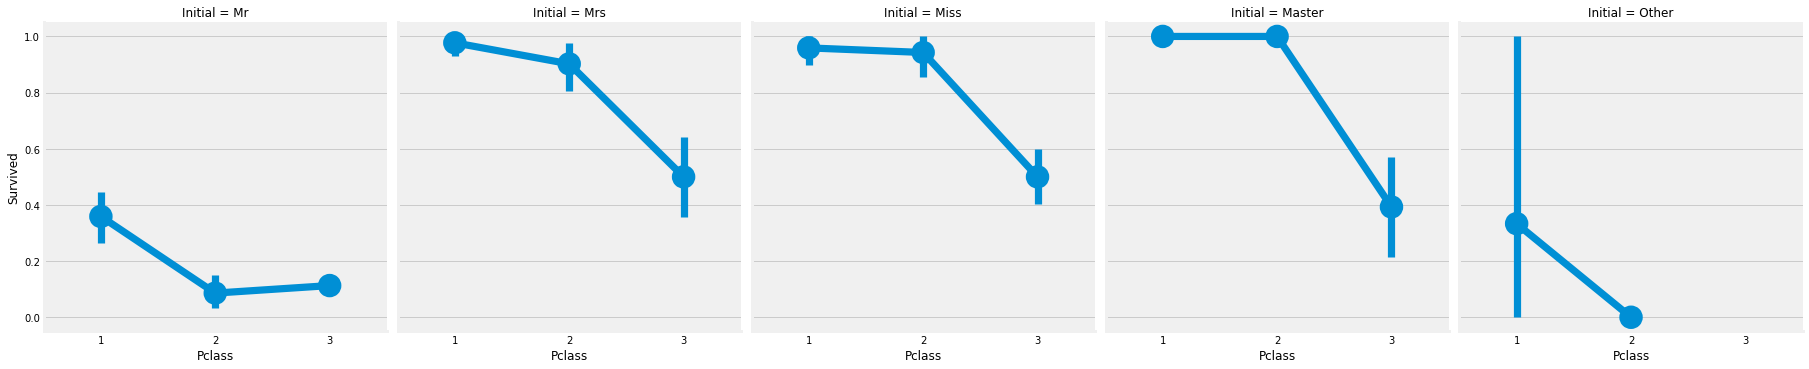

In [27]:
sns.factorplot('Pclass','Survived', col='Initial', data=data) # 여기서 col : column
plt.show()

# insight : 위에서 확인했던 내용이 사실임 (Mrs, Miss, Master(애기들 나이))에서 생존 률이 굉장히 높음

### Embarked -> Categorical

In [28]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

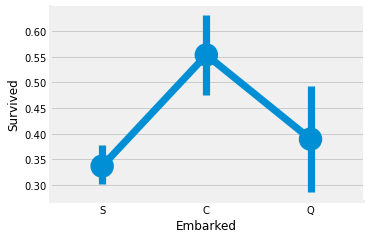

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

 # C에서 탑승한 사람들의 생존 비율이 더 높음

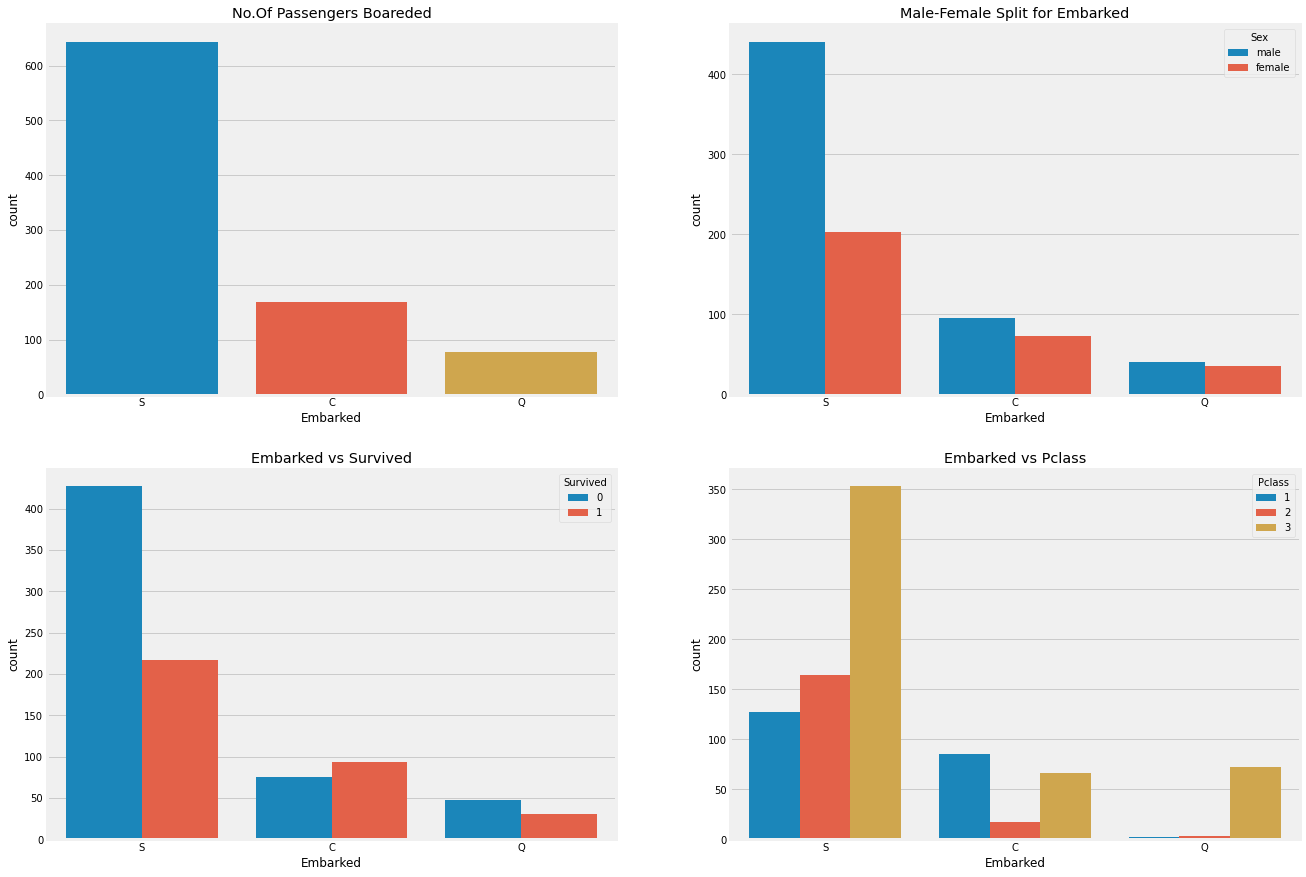

In [30]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title("No.Of Passengers Boareded")
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title("Male-Female Split for Embarked")
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title("Embarked vs Survived")
sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")
plt.show()

# insight : S 항구에서 탑승한 사람이 많은데 이들의 대부분은 3 class / C에서 대부분 살아남은 이유는 class 1의 승객들이 많이 이용했기 때문으로도 볼 수 있음

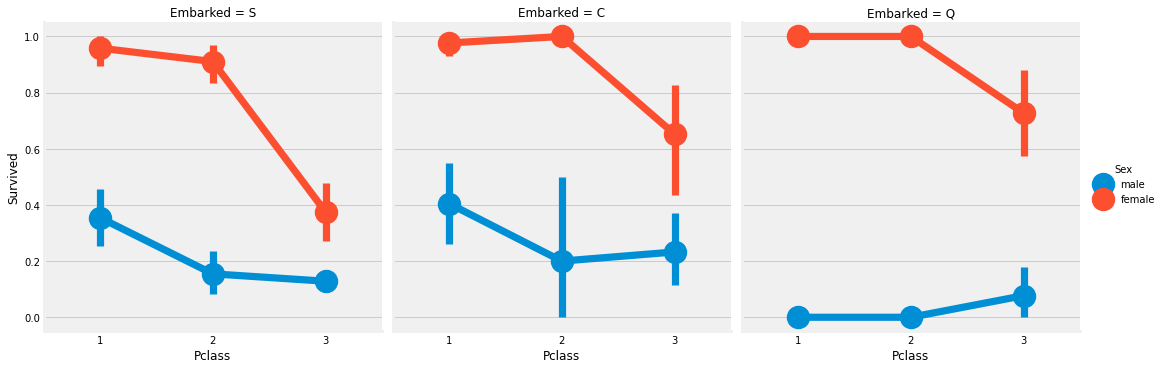

In [31]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data=data)
plt.show()

 # insight : Money Matters ) 탑승구에 상관없이 class가 좋을수록 생존률이 매우 높음

In [32]:
data['Embarked'].isnull().sum()

2

In [33]:
# Filling Embarked NaN
data['Embarked'].fillna('S', inplace=True) # NaN값이 두개뿐이므로 탑승객이 가장많은 S로 대체 

In [34]:
data['Embarked'].isnull().any()

False

### sibsp -> Descrete Feature
: 가족이 있는지 없는지 여부

In [35]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


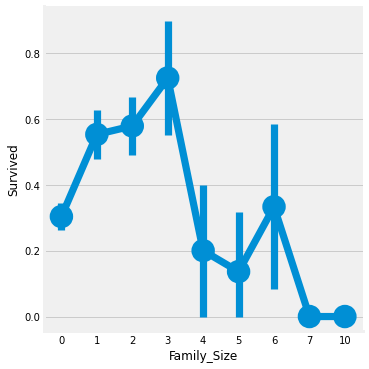

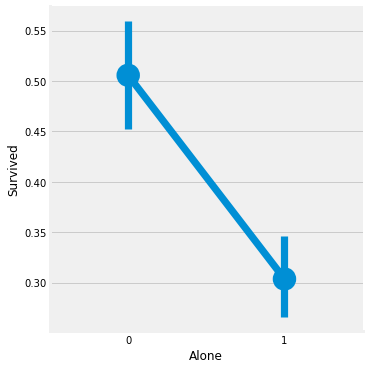

In [36]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

#f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data) #,ax=ax[0])
#ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data) #,ax=ax[1])
#ax[1].set_title('Alone vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

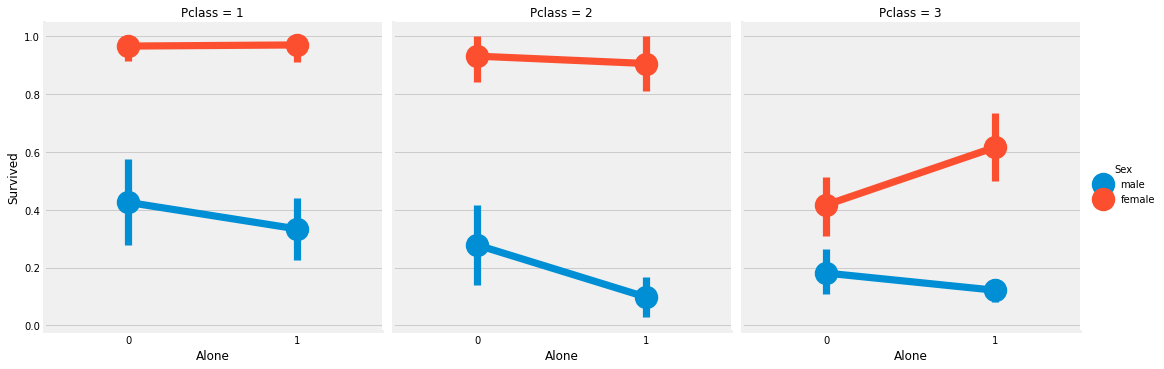

In [37]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [38]:
# Fare_Range : 연속형이라서 순서대로 qcut해줄 예정
data['Fare_Range']=pd.qcut(data['Fare'],4) # 4개 구간으로 잘라서 저장
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient('summer_r') 
# 각 구간의 생존비율(1,0 변수이므로 평균구하면 비율 나옴)을 구해서 표로 표시

# 해석 : Fare가 높을 수록 살아남을 확률도 높음 - money win!

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
# Parch
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


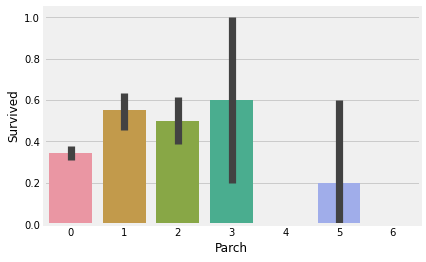

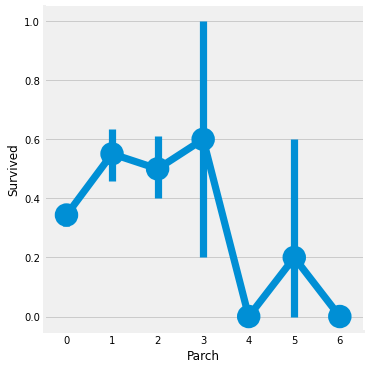

In [40]:
# f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data) #, ax=ax[0])
# ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived', data=data) #, ax=ax[1])
# ax[01.set_title('Parch vs Survived')
#plt.close(2)
plt.show()

In [41]:
# Fare -> Countinuous Feature
print('High Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was',data['Fare'].mean())

High Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was 32.2042079685746


Text(0.5, 1.0, 'Fares in Pclass3')

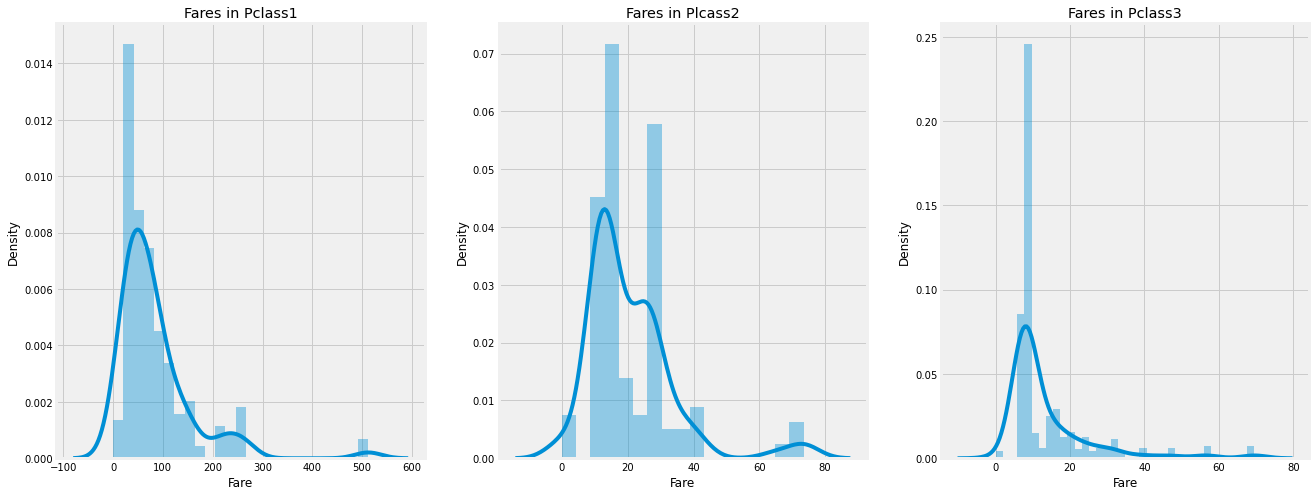

In [42]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Plcass2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass3')

# Pclass1의 Fare 범위가 더 넓고 전반적으로 비쌈
# class가 내려갈 수록 fare가 낮고 그 범위도 좁음
# 범주화 시켜서 사용할 수도 있음

변수간 상관관계

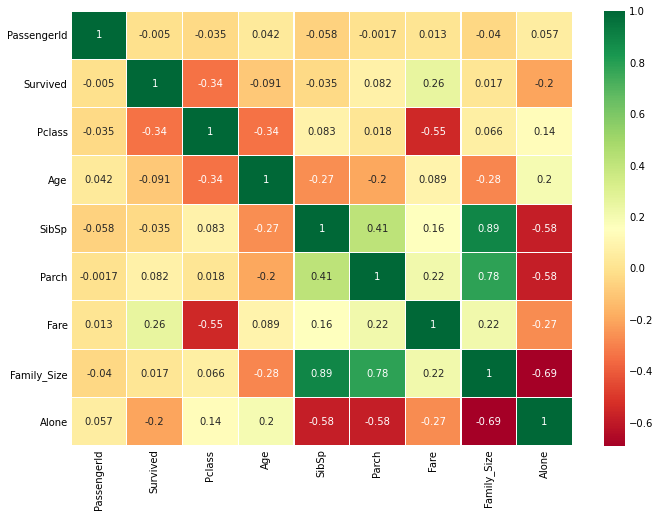

In [43]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2) 
#annot : bool or rectangular dataset, optional
# If True, write the data value in each cell. If an array-like with the
# same shape as data, then use this to annotate the heatmap instead
# of the data. Note that DataFrames will match on position, not index.
fig=plt.gcf() # gcf : get the current figure
fig.set_size_inches(10,8)
plt.show()

# 이 경우 가장 높은 상관관계가 -0.55, 0.41로 그리 크지않으므로 변수 삭제없이 그냥 사용

In [44]:
#correlation은 연속형 변수들에 대해서만 수행됨 / 너무 상관관계가 높은 변수들을 같이 사용할 경우 다중공선성 발생할 수 있음 / redundant : 여분의

In [45]:
data.corr() # data.corr()의 형태가 array-like with the same shape as data이므로 annotate 필요

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500,0.065997,0.135207
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087,-0.282260,0.198855
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000,0.217138,-0.271832
Family_Size,-0.040143,0.016639,0.065997,-0.282260,0.890712,0.783111,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.198855,-0.584471,-0.583398,-0.271832,-0.690922,1.000000


# Part 2

In [46]:
# Age_band : age를 연속형으로 쓰는 것 보다 범주형을 만들어서 사용하는게 머신러닝에서 좋음
# 5개 범위로 나눠서 사용 max age = 80이었음
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_Size,Alone,Fare_Range,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,"(-0.001, 7.91]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,"(31.0, 512.329]",2


In [47]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


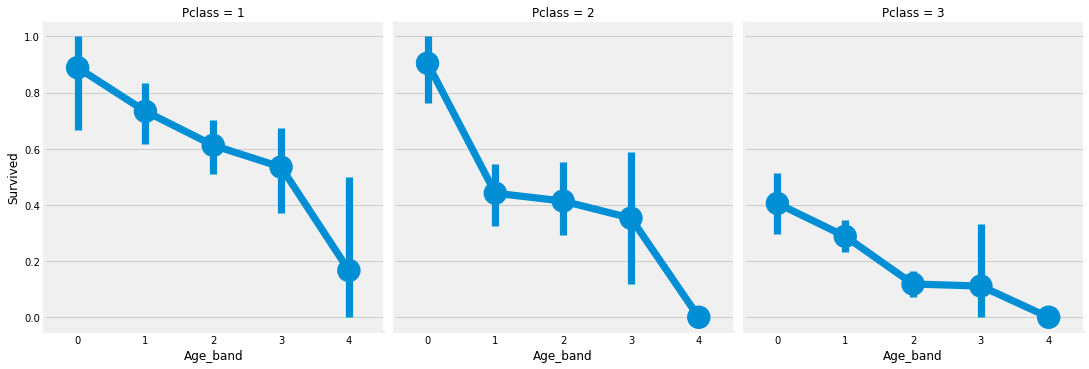

In [48]:
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
# Pclass에 따른 연령대별 생존 비율
plt.show()

# 해석 : 전반적으로 나이가 어릴 수록 생존 확률이 높아짐 
# class 1,2에 속한 경우 가장 어린 연령대는 생존확률이 거의 1임

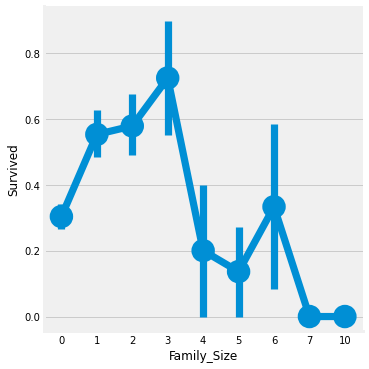

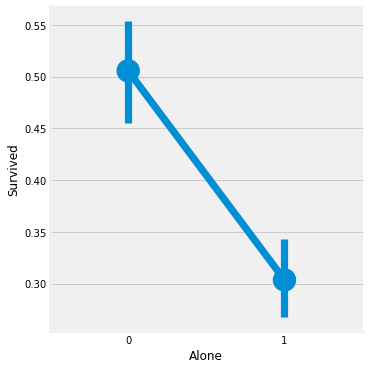

In [49]:
# Family_Size and Alone (새로운 변수 생성 using Parch(자녀&부모) familysize) and SibSp(형재자매, 남편이나 부인))
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] # family_size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone(가족이 없는 경우에만 1로 표시)

f, ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1) # 원래 : plt.close(2), plt.close(3)
plt.show()

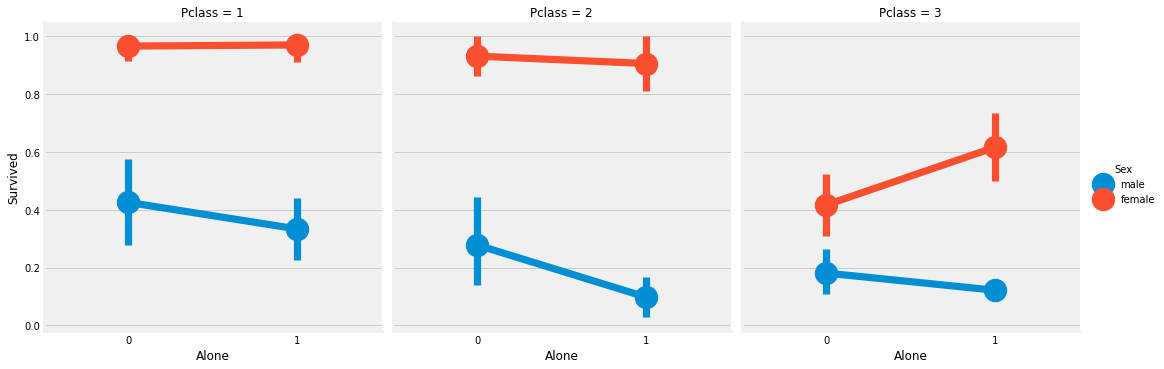

In [50]:
sns.factorplot('Alone','Survived', data=data, hue='Sex',col='Pclass')
plt.show()

In [51]:
# Fare_Range에 구간별로 변수명 부여해서 Fare_cat 변수 생성
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.1)&(data['Fare']<=512.329),'Fare_cat']=3

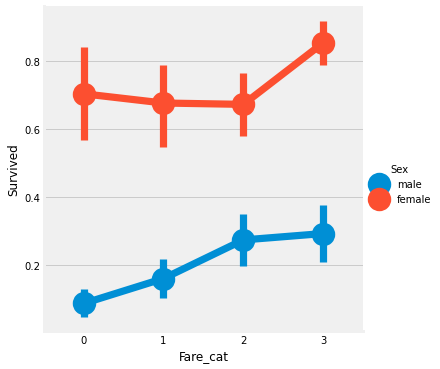

In [52]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [53]:
# Converting String Value into Numeric - sex, embarked, etc 문자형은 머신러닝에서 사용안되므로 바꾸기
data['Sex'].replace(['male','female'],[0,1],inplace=True) # 순서대로 짝지어서 대체
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0,1,2,3,4], inplace=True)

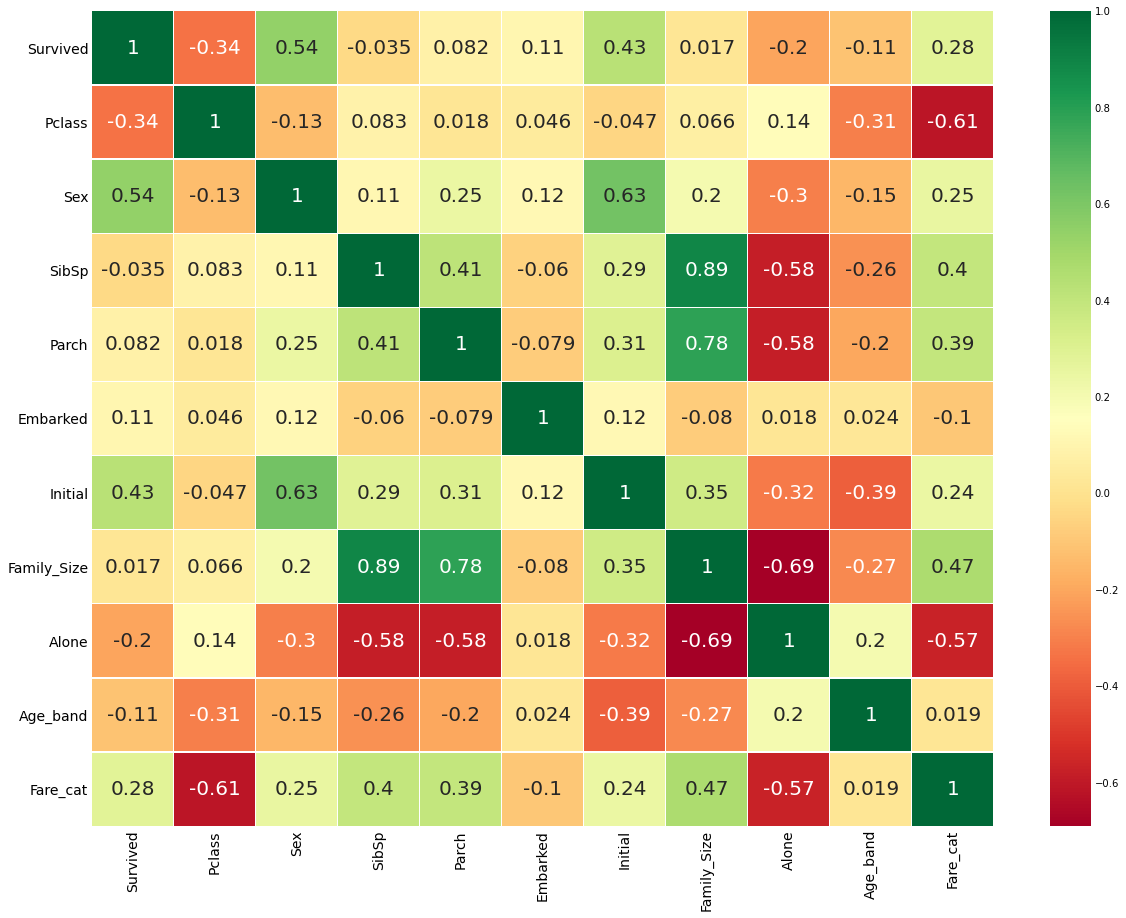

In [54]:
# Dropping UnNeeded Features - name. age(변환완), ticket, fare(변환완), cabin, fare_range(변환완), passegerid
data.drop(['Name','Age','Fare','PassengerId','Ticket','Fare_Range','Cabin'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 해석 : SibSp나 Family_size / Parch & Family_Size / Alone & Family_Size 등이 굉장히 높은 상관관계를 보이고 있음

# Part3 : Predictive Modeling - classification model

In [55]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # 분류모델 성능평가에 사용 (ex) 참true를 true로 예측한수, 참false를 true로 예측한 수 ..)

In [56]:
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived']) # stratify : y 데이터 지정해서 계층적 추출이 가능하도록함 (여러 층으로 분할후 각 층별로 렌덤 데이터 추출, 원래 데이터의 분포와 유사하게 데이터 추출)
train_X = train[train.columns[1:]] # 칼럼s에서 인덱스 순서로 0번이 Survived인 상태이므로 나머지만 가져옴 
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [57]:
# Radial support vector machines(rbf-SVM)
model = svm.SVC(kernel='rbf', C=1, gamma=0.1) # C : regularization parameter(무조건 양수) - 오차가 적게 만드는 모델에 더 비중을 두는 경우
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


In [58]:
# Linear support vector machines(linear-SVM)
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [59]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [60]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print("The accuracy of the Logistic Regression is", metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8208955223880597


In [61]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [62]:
# K-Nearest Neighbours(KNN)
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8283582089552238


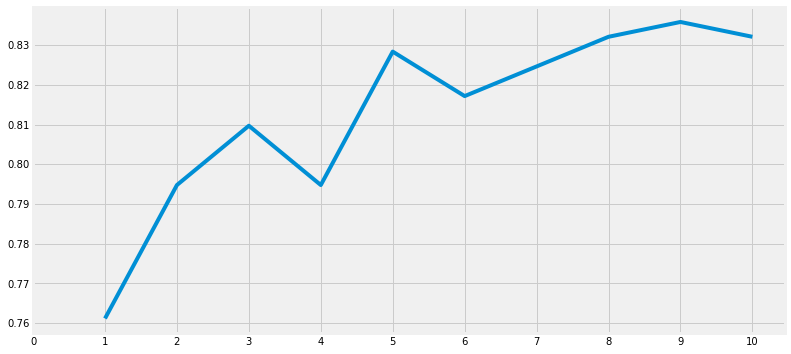

Accuracies for different values of n are : [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [63]:
    # KNN은 n_neighbours값을 바꿈에 따라 모델이 달라짐. default는 5 따라서 값을 바꿔가면서 확인해보자
a_index = list(range(1,11))
a=pd.Series() # 판다스 데이터 형식 중 1차원 배열
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)) :
        model = KNeighborsClassifier(n_neighbors = i)  # 옵션 바꿔가면서 결과 보기
        model.fit(train_X, train_Y)
        model.fit(train_X, train_Y)
        prediction = model.predict(test_X)
        a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y))) # score값 순서대로 저장
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are :', a.values,'with the max value as', a.values.max())

In [64]:
# Gaussian Naive Bayes
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy ofthe NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy ofthe NaiveBayes is 0.8134328358208955


In [65]:
# Random Forest
model = RandomForestClassifier(n_estimators=100) # 사용할 decision tree 수
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8246268656716418


## Cross-Valdiation
### 새로운 테스트 셋에 대해서도 같은 결과가 나오지 않을 수 있으므로 cross-validation을 통해 get generalized model을 만들어보자

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10,random_state=22, shuffle=True)
xyz=[]
accuracy=[] # 값 저장할 리스트 생성
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result) # 10개의 cv결과로 나온 accuracy 값들이 리스트로 accuracy라는 이름의 리스트에 순서대로 저장됨(리스트 안에 리스트로 원소가 돼서 들어가는 것)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.800300,0.044429
KNN,0.807016,0.041635
Decision Tree,0.802497,0.047852
Naive Bayes,0.793596,0.055424
Random Forest,0.809226,0.039116


<AxesSubplot:>

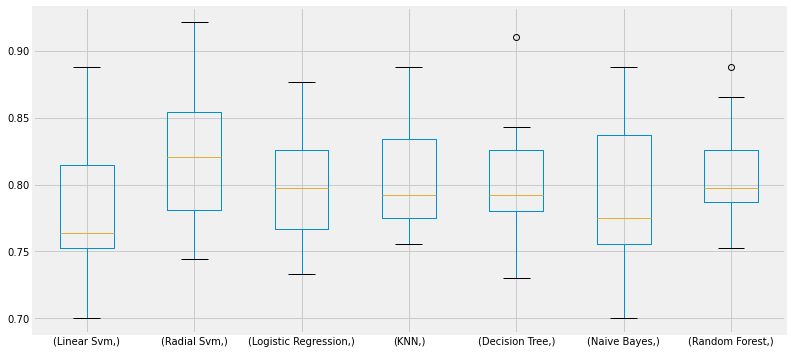

In [67]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers]) # S
box.T.boxplot()

In [68]:
box # dataframe형태로 만든것

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.700000,0.764045,0.752809,0.820225,0.730337,0.764045,0.887640,0.752809,0.797753,0.887640
Radial Svm,0.744444,0.775281,0.808989,0.853933,0.775281,0.797753,0.921348,0.831461,0.853933,0.921348
Logistic Regression,0.733333,0.775281,0.808989,0.797753,0.752809,0.764045,0.865169,0.797753,0.831461,0.876404
KNN,0.755556,0.797753,0.775281,0.808989,0.775281,0.786517,0.865169,0.842697,0.775281,0.887640
Decision Tree,0.777778,0.842697,0.752809,0.797753,0.808989,0.730337,0.831461,0.786517,0.786517,0.910112
Naive Bayes,0.700000,0.775281,0.752809,0.775281,0.764045,0.752809,0.865169,0.820225,0.842697,0.887640
Random Forest,0.788889,0.831461,0.752809,0.775281,0.797753,0.797753,0.865169,0.808989,0.786517,0.887640


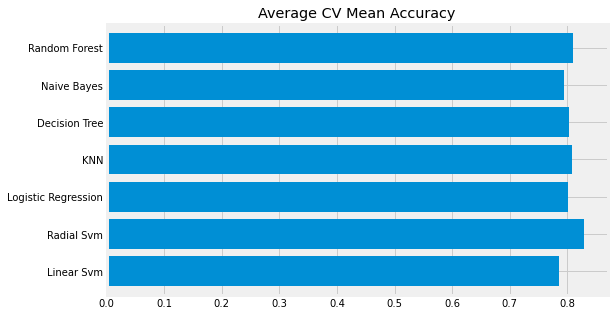

In [69]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8) # barh : 가로 막대 그래프
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix
- gives the number of correct and incoreect classifications made by the classifier
- 그냥 accuracy만 보는 것은 imbalance로 인한 misleading의 가능성있음 따라서 confusion matrix로 check

In [70]:
#기본적인 confusion matrix 형태
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
confusion_matrix(Y, y_pred)

array([[491,  58],
       [ 95, 247]], dtype=int64)

<AxesSubplot:>

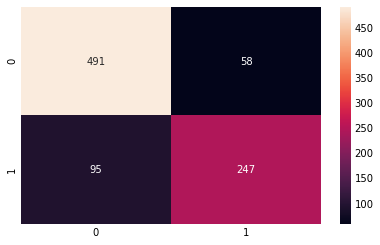

In [71]:
# confusion_matrix visualizaiton
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), annot=True, fmt="2.0f")

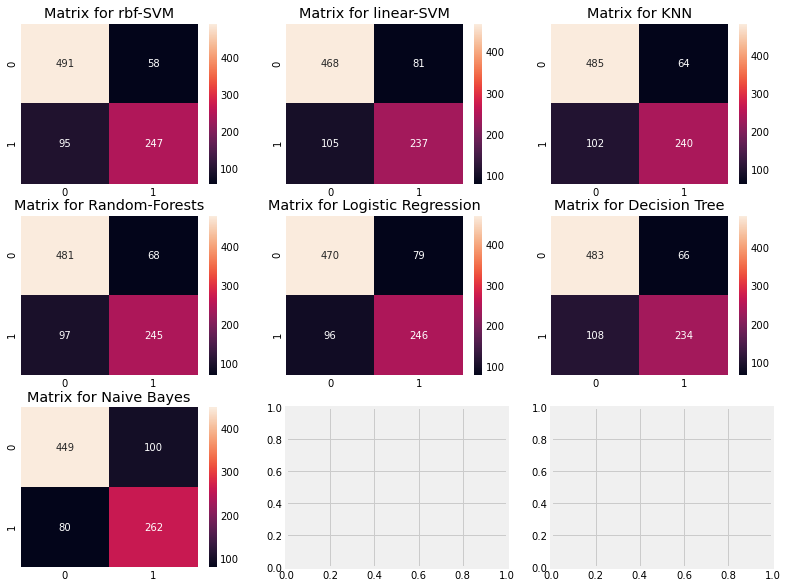

In [72]:
# 여러 모델의 confusion_matircs를 보고자함
# 옵션 중 annot : annotation(주석)을 위에 달 것인지!
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt="2.0f")
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt="2.0f")
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt="2.0f")
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt="2.0f")
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt="2.0f")
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt="2.0f")
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt="2.0f")
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

interpreting Confusion Matrix
y축 : 참값(생존여부 0: 사망, 1: 생존)
x축 : 예측값
따라서 accuracy of rbf-SVM : (491+297)/891 = 82.8%

#### Hyper-Parameter Tuning
: SVM & Randomforest 예시로

In [73]:
# SVM
from sklearn.model_selection import GridSearchCV
C = [0.05,1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear'] # rbf, linear 모두 수행
hyper={'kernel' : kernel, 'C':C, 'gamma' : gamma } # 미리 딕셔너리로 생성
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True) # verbose : 말이 많은 / logging output을 출력하기 위한 옵션
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

# 뭔가 출력되는 창이 캐글보다 적음,, verbose옵션 관련인가?

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=1, gamma=0.1)


In [74]:
# RandomForests
n_estimators = range(100,1000,100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8215680120519743
RandomForestClassifier(n_estimators=900, random_state=0)


## Ensembling(앙상블)
: combinatio of various simple models to create a single powerful model. /
basic idea ) making a strong judgement about a single product after analysing all different parameters

#### Voting (다수결 분류): gives average prediction result based on the prediction of all the submodels.
https://nonmeyet.tistory.com/entry/Python-Voting-Classifiers%EB%8B%A4%EC%88%98%EA%B2%B0-%EB%B6%84%EB%A5%98%EC%9D%98-%EC%A0%95%EC%9D%98%EC%99%80-%EA%B5%AC%ED%98%84

In [75]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[("KNN", KNeighborsClassifier(n_neighbors=10)), ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)), ("RFor", RandomForestClassifier(n_estimators=500, random_state=0)), ('LR', LogisticRegression(C=0.05)), ('DT', DecisionTreeClassifier(random_state=0)), ('NB', GaussianNB()), ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft').fit(train_X, train_Y)
# soft voting : 앙상블에 사용되는 모든 분류기가 클래스의 확률을 예측할 수 있을 때 사용 / 각 분류기의 예측을 평균대어 가장 확률이 높은 클래스로 분류하게 됨 (가중치 투표) <-> har voting : 딱 하나의 분류기를 선택해서 그에 따라 분류

print('The accuracy for ensembeled model is:', ensemble_lin_rbf.score(test_X, test_Y))

cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross valdiated score is', cross.mean())

The accuracy for ensembeled model is: 0.8246268656716418
The cross valdiated score is 0.8260424469413234


#### Bagging : general ensembel method. 비슷한 분류기들을 이용해 적용하고 전체의 평균을 사용. 평균을 이용하기 때문에 분산이 줄어듦

In [76]:
# Bagged KNN

from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validation score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validation score for bagged KNN is: 0.8171660424469414


In [77]:
# Bagged DecisionTree

model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction , test_Y))
result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8283582089552238
The cross validated score for bagged Decision Tree is: 0.8160174781523096


#### Boosting : step by step enhancement of a weak model.
전체 셋에 대해 학습 - 오분류된 것들에 가중치 부여 - 재학습 - 반복

In [79]:
# AdaBoost (Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249074132195091


In [82]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8137827715355804


In [84]:
# XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[11:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [87]:
# 위의 세가지 부스팅 방법 중 AdaBoost의 성능이 가장 좋으므로 
n_estimators = list(range(100,500,100)) # 시도해볼 파라미터 값들 저장
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4]
hyper = {"n_estimators" : n_estimators, "learning_rate":learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True) # 자세히 설명이 나오도록 verbose = True
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


The cross validated score for Tuned_AdaBoost is: 0.35241301907968575


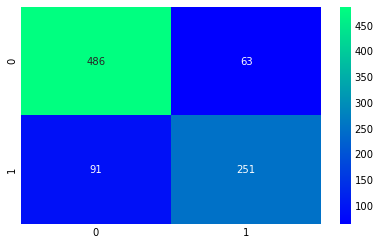

In [89]:
# Hyper-Param tuning으로 얻어진 parameter 값을 대입해서 모델을 개선시켜보자
# & confusion matrix for the Best Model
ada = AdaBoostClassifier(n_estimators=300, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
print('The cross validated score for Tuned_AdaBoost is:', result.mean())
sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

In [91]:
print('accuracy is :',(486+251)/891)

accuracy is : 0.8271604938271605


### Feature Importance

[11:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


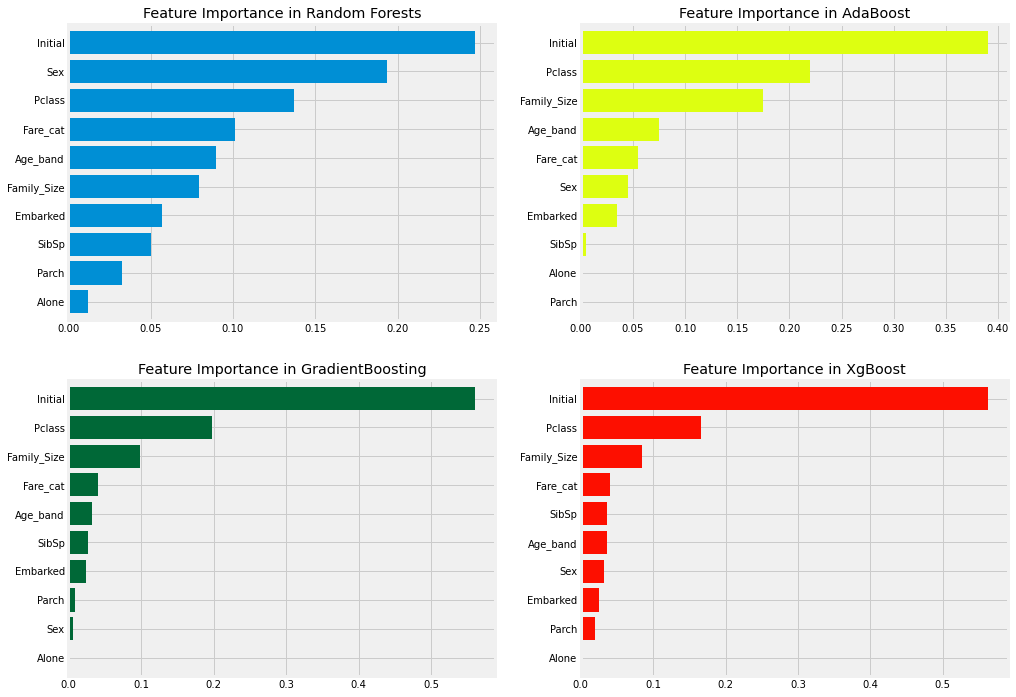

In [98]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11') # color : 컬러차트번호를 지정해서 작성
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r') # 사전에 나와있는 cmap이름을 이용해서 색상 지정
ax[1,0].set_title("Feature Importance in GradientBoosting")

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

# 끝!